# Project: Predicting and Understanding Diabetes Risk

#### Team Name: The Databetics 
#### Team Members: Sophia Shen, Sylvie Bon-Harper, Jeslyn Pratiknjo, Meghan Howell

In [1]:
import pandas as pd
import seaborn as sns
import random

#%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import numpy as np
pd.set_option("future.no_silent_downcasting", True)
pd.options.mode.chained_assignment = None

## Cleaning Data ###

In [2]:
unfixeddiabetes = pd.read_csv('~/F24-public/project/C1/diabetes.csv')
unfixeddiabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
#removing prediabetes rows
pre = unfixeddiabetes['Diabetes_012'] != 1.0
diabetes_unbalanced = unfixeddiabetes[pre]

In [4]:
#rename label without 1
diabetes_unbalanced = diabetes_unbalanced.rename(columns= {'Diabetes_012': 'Diabetes_02'})
diabetes_unbalanced

,Diabetes_02,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
sum(diabetes_unbalanced['Diabetes_02'] == 0)

213703

In [6]:
sum(diabetes_unbalanced['Diabetes_02'] == 2)

35346

In [7]:
#balancing dataset
diabetes_0 = diabetes_unbalanced[diabetes_unbalanced['Diabetes_02']==0]
diabetes_0_new = diabetes_0.sample(35346, random_state=42)
diabetes_2 = diabetes_unbalanced[diabetes_unbalanced['Diabetes_02']==2]

In [8]:
diabetes = pd.concat([diabetes_0_new, diabetes_2], ignore_index=True)

In [9]:
#defined function 1
def remove_outlier(Q1, Q3, table, label):
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5*IQR
    upper_threshold = Q3 + 1.5*IQR
    return table[(lower_threshold < table[label]) & (table[label] < upper_threshold)]

In [10]:
diabetes = remove_outlier(diabetes.BMI.quantile(0.25), diabetes.BMI.quantile(0.75), diabetes, 'BMI')

In [11]:
diabetes = remove_outlier(diabetes.MentHlth.quantile(0.25), diabetes.MentHlth.quantile(0.75), diabetes, 'MentHlth')

In [12]:
diabetes = remove_outlier(diabetes.PhysHlth.quantile(0.25), diabetes.PhysHlth.quantile(0.75), diabetes, 'PhysHlth')

In [13]:
diabetes = remove_outlier(diabetes.Age.quantile(0.25), diabetes.Age.quantile(0.75), diabetes, 'Age')
diabetes

,Diabetes_02,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,8.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,9.0,6.0,6.0
3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
5,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,8.0
6,0.0,0.0,1.0,1.0,43.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,4.0,0.0,6.0,0.0,0.0,7.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70685,2.0,1.0,0.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,6.0,2.0
70687,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70690,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


### Visualization: table ###

In [14]:
diabetes.groupby('Diabetes_02').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_02,,,,,,,,,,,,,,,,,,,,,
0.0,0.352852,0.375175,0.955353,27.190432,0.407278,0.023336,0.058244,0.810348,0.661173,0.832671,...,0.956989,0.052010,2.143759,0.325230,0.629461,0.071646,0.459911,8.043128,5.183770,6.516363
2.0,0.725351,0.636957,0.994359,30.435740,0.488472,0.065682,0.178652,0.711959,0.604729,0.773619,...,0.965368,0.060826,2.881536,0.286128,0.904788,0.202541,0.530070,9.622977,4.851663,5.668743


In [15]:
diabetes.filter(['Diabetes_02', 'BMI', 'PhysActivity']).groupby('Diabetes_02').mean()

,BMI,PhysActivity
Diabetes_02,,
0.0,27.190432,0.810348
2.0,30.435740,0.711959


In [16]:
diabetes['Diabetes_02'].corr(diabetes['PhysActivity'])

np.float64(-0.11556597906014833)

In [17]:
diabetes['Diabetes_02'].corr(diabetes['BMI'])

np.float64(0.3024854968489143)

In [18]:
diabetes['Diabetes_02'].corr(diabetes['HighBP'])

np.float64(0.3702740020564629)

In [19]:
diabetes['Diabetes_02'].corr(diabetes['HighChol'])

np.float64(0.2600956015360087)

## Model 1: Decision Tree ##

In [20]:
def decision_tree(selected, depth, diabetes):
    diabetes = diabetes.filter(selected)
    train_diabetes = diabetes.sample(frac = 0.8)
    test_diabetes = diabetes.drop(index = train_diabetes.index)
    
    X_train_diabetes = train_diabetes.drop(columns='Diabetes_02')
    y_train_diabetes = train_diabetes['Diabetes_02']
    X_test_diabetes = test_diabetes.drop(columns = 'Diabetes_02')
    y_test_diabetes = test_diabetes['Diabetes_02']
    
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.metrics import roc_auc_score
    
    T = DecisionTreeClassifier(max_depth=depth)
    T.fit(X_train_diabetes, y_train_diabetes)
    print(pd.DataFrame(T.predict(X_test_diabetes)).value_counts())

    train_score = T.score(X_train_diabetes, y_train_diabetes)
    test_score = T.score(X_test_diabetes, y_test_diabetes)
    
    print('Score on train:', train_score)
    print('Score on test:', test_score)
    
    fig, ax = plots.subplots(1, figsize = (30, 30))
    p = plot_tree(T, filled = True, feature_names = X_train_diabetes.columns)

#### Decision tree with all features

0  
0.0    6305
2.0    2906
Name: count, dtype: int64
Score on train: 0.6968487908150802
Score on test: 0.7005753989794811


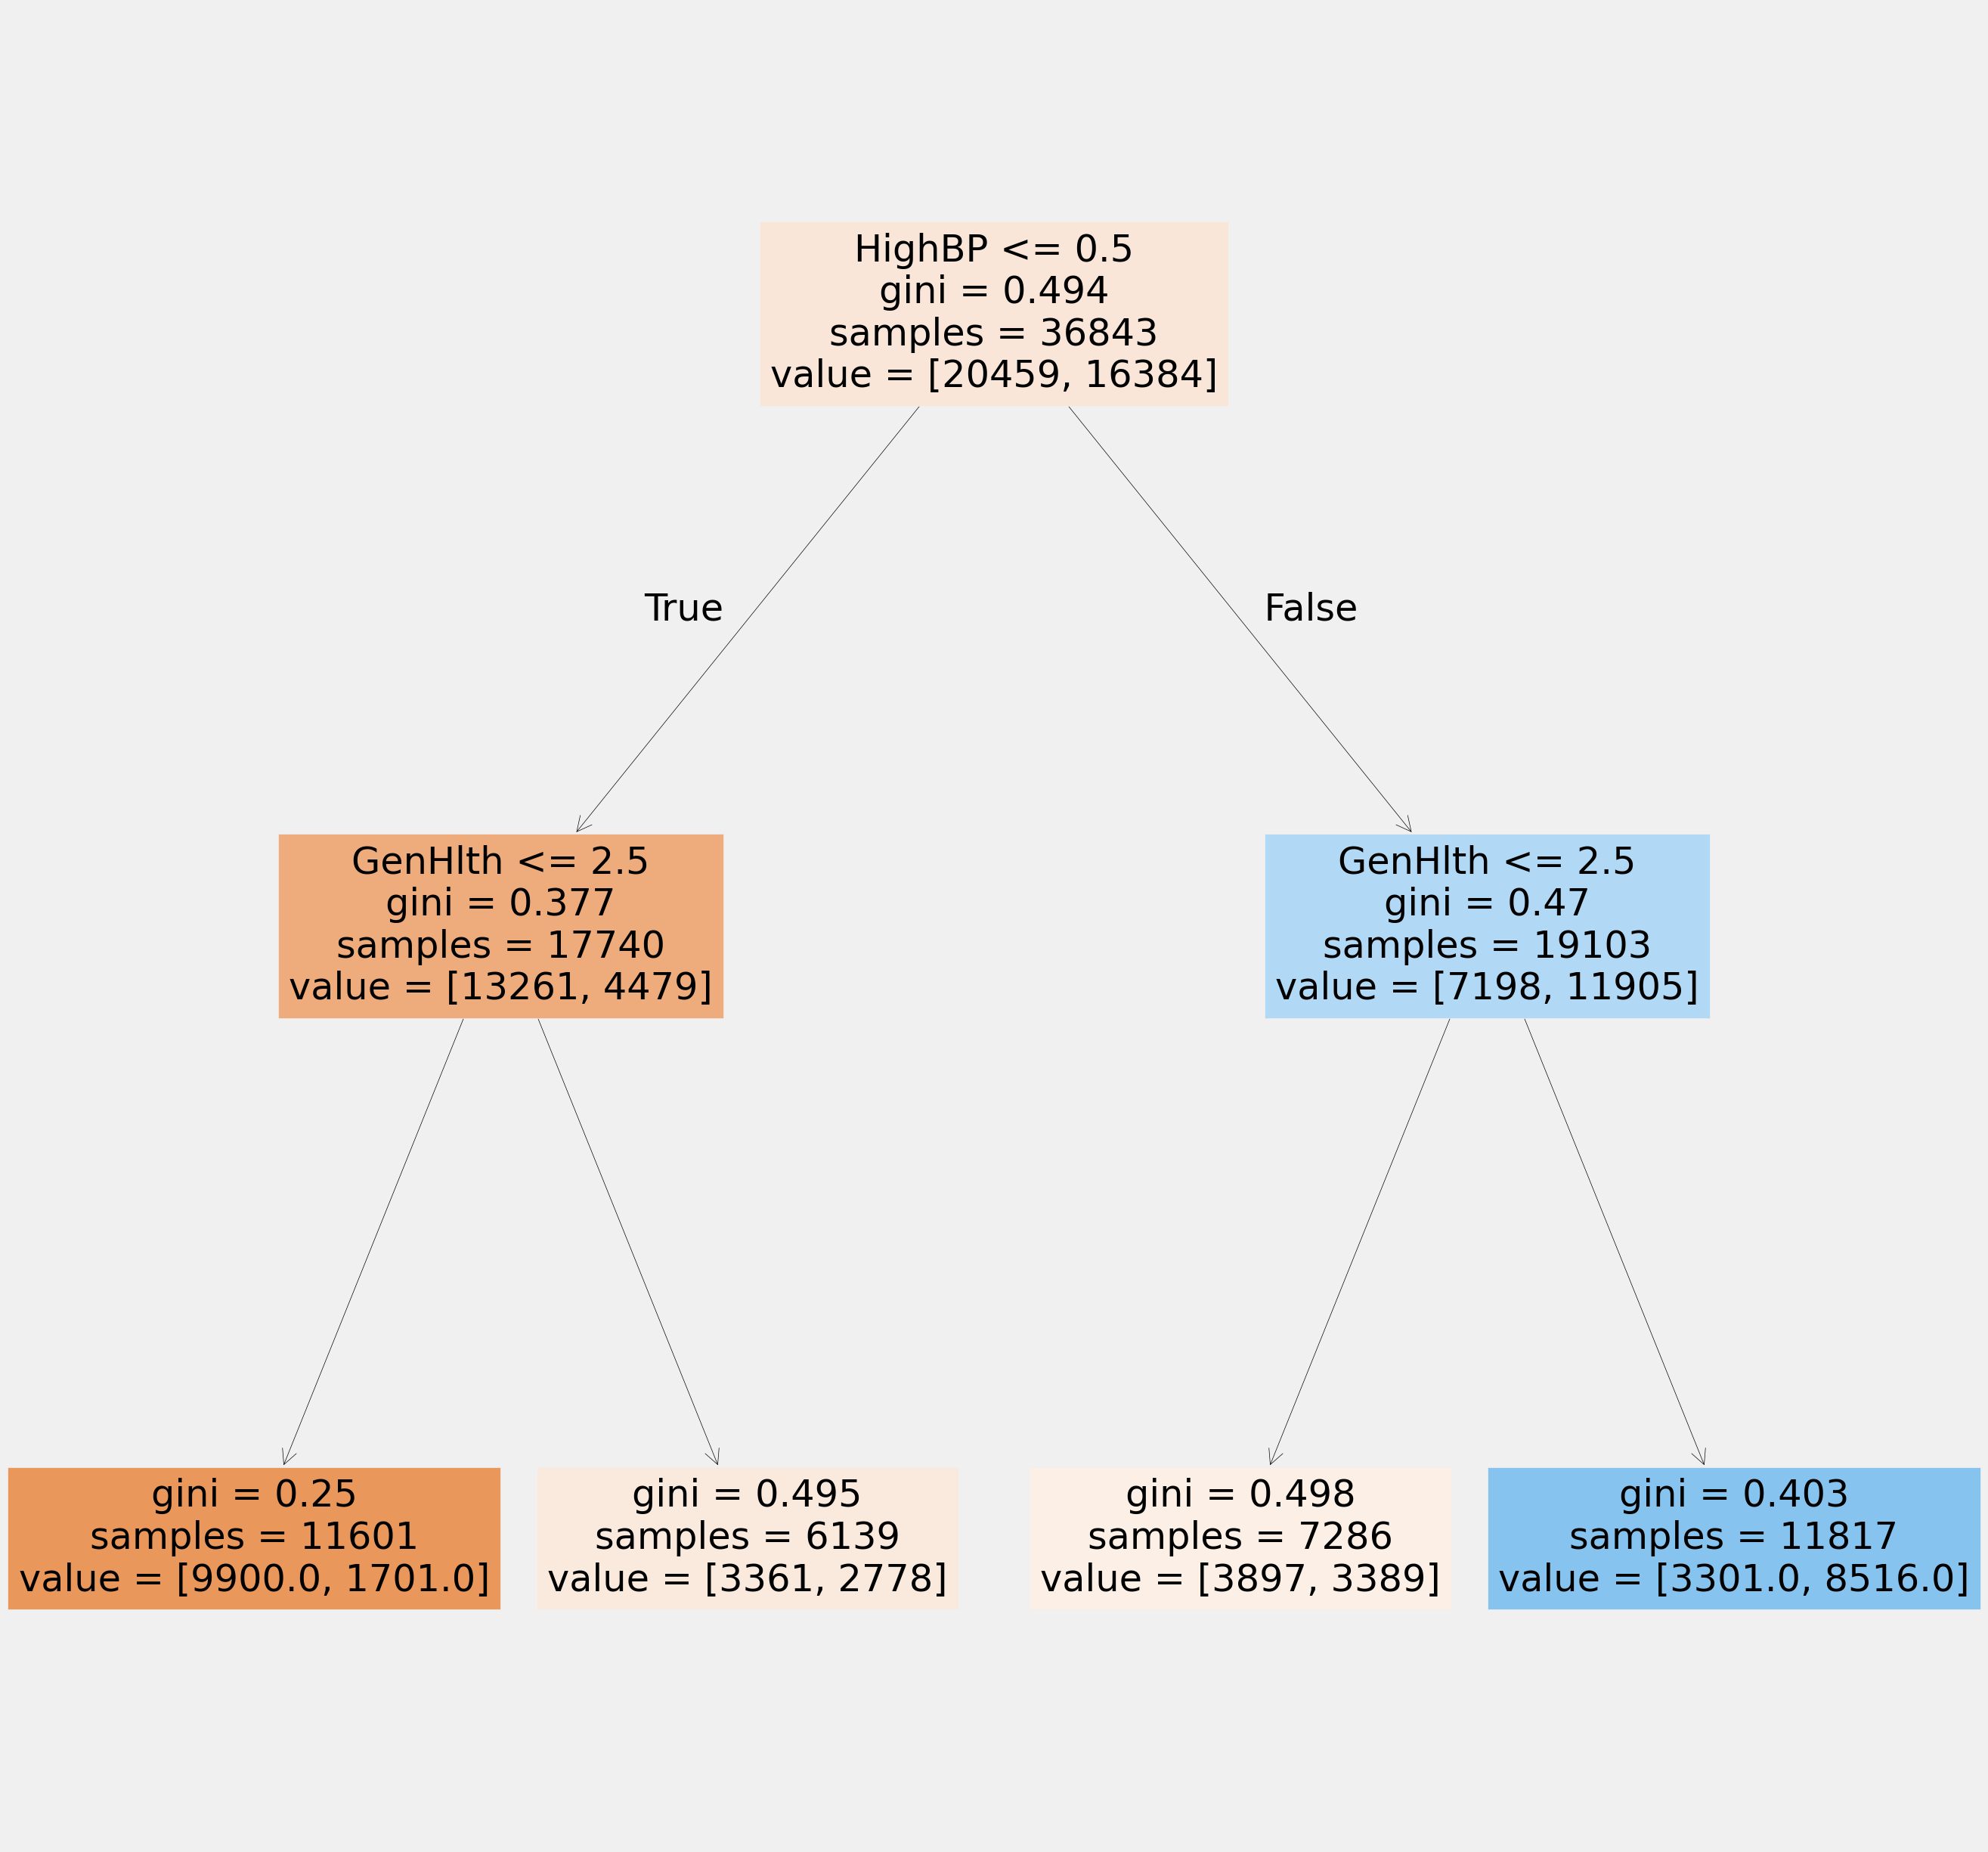

In [21]:
decision_tree(list(diabetes.columns), 2, diabetes)

0  
0.0    4727
2.0    4484
Name: count, dtype: int64
Score on train: 0.7202453654696958
Score on test: 0.7107805884268809


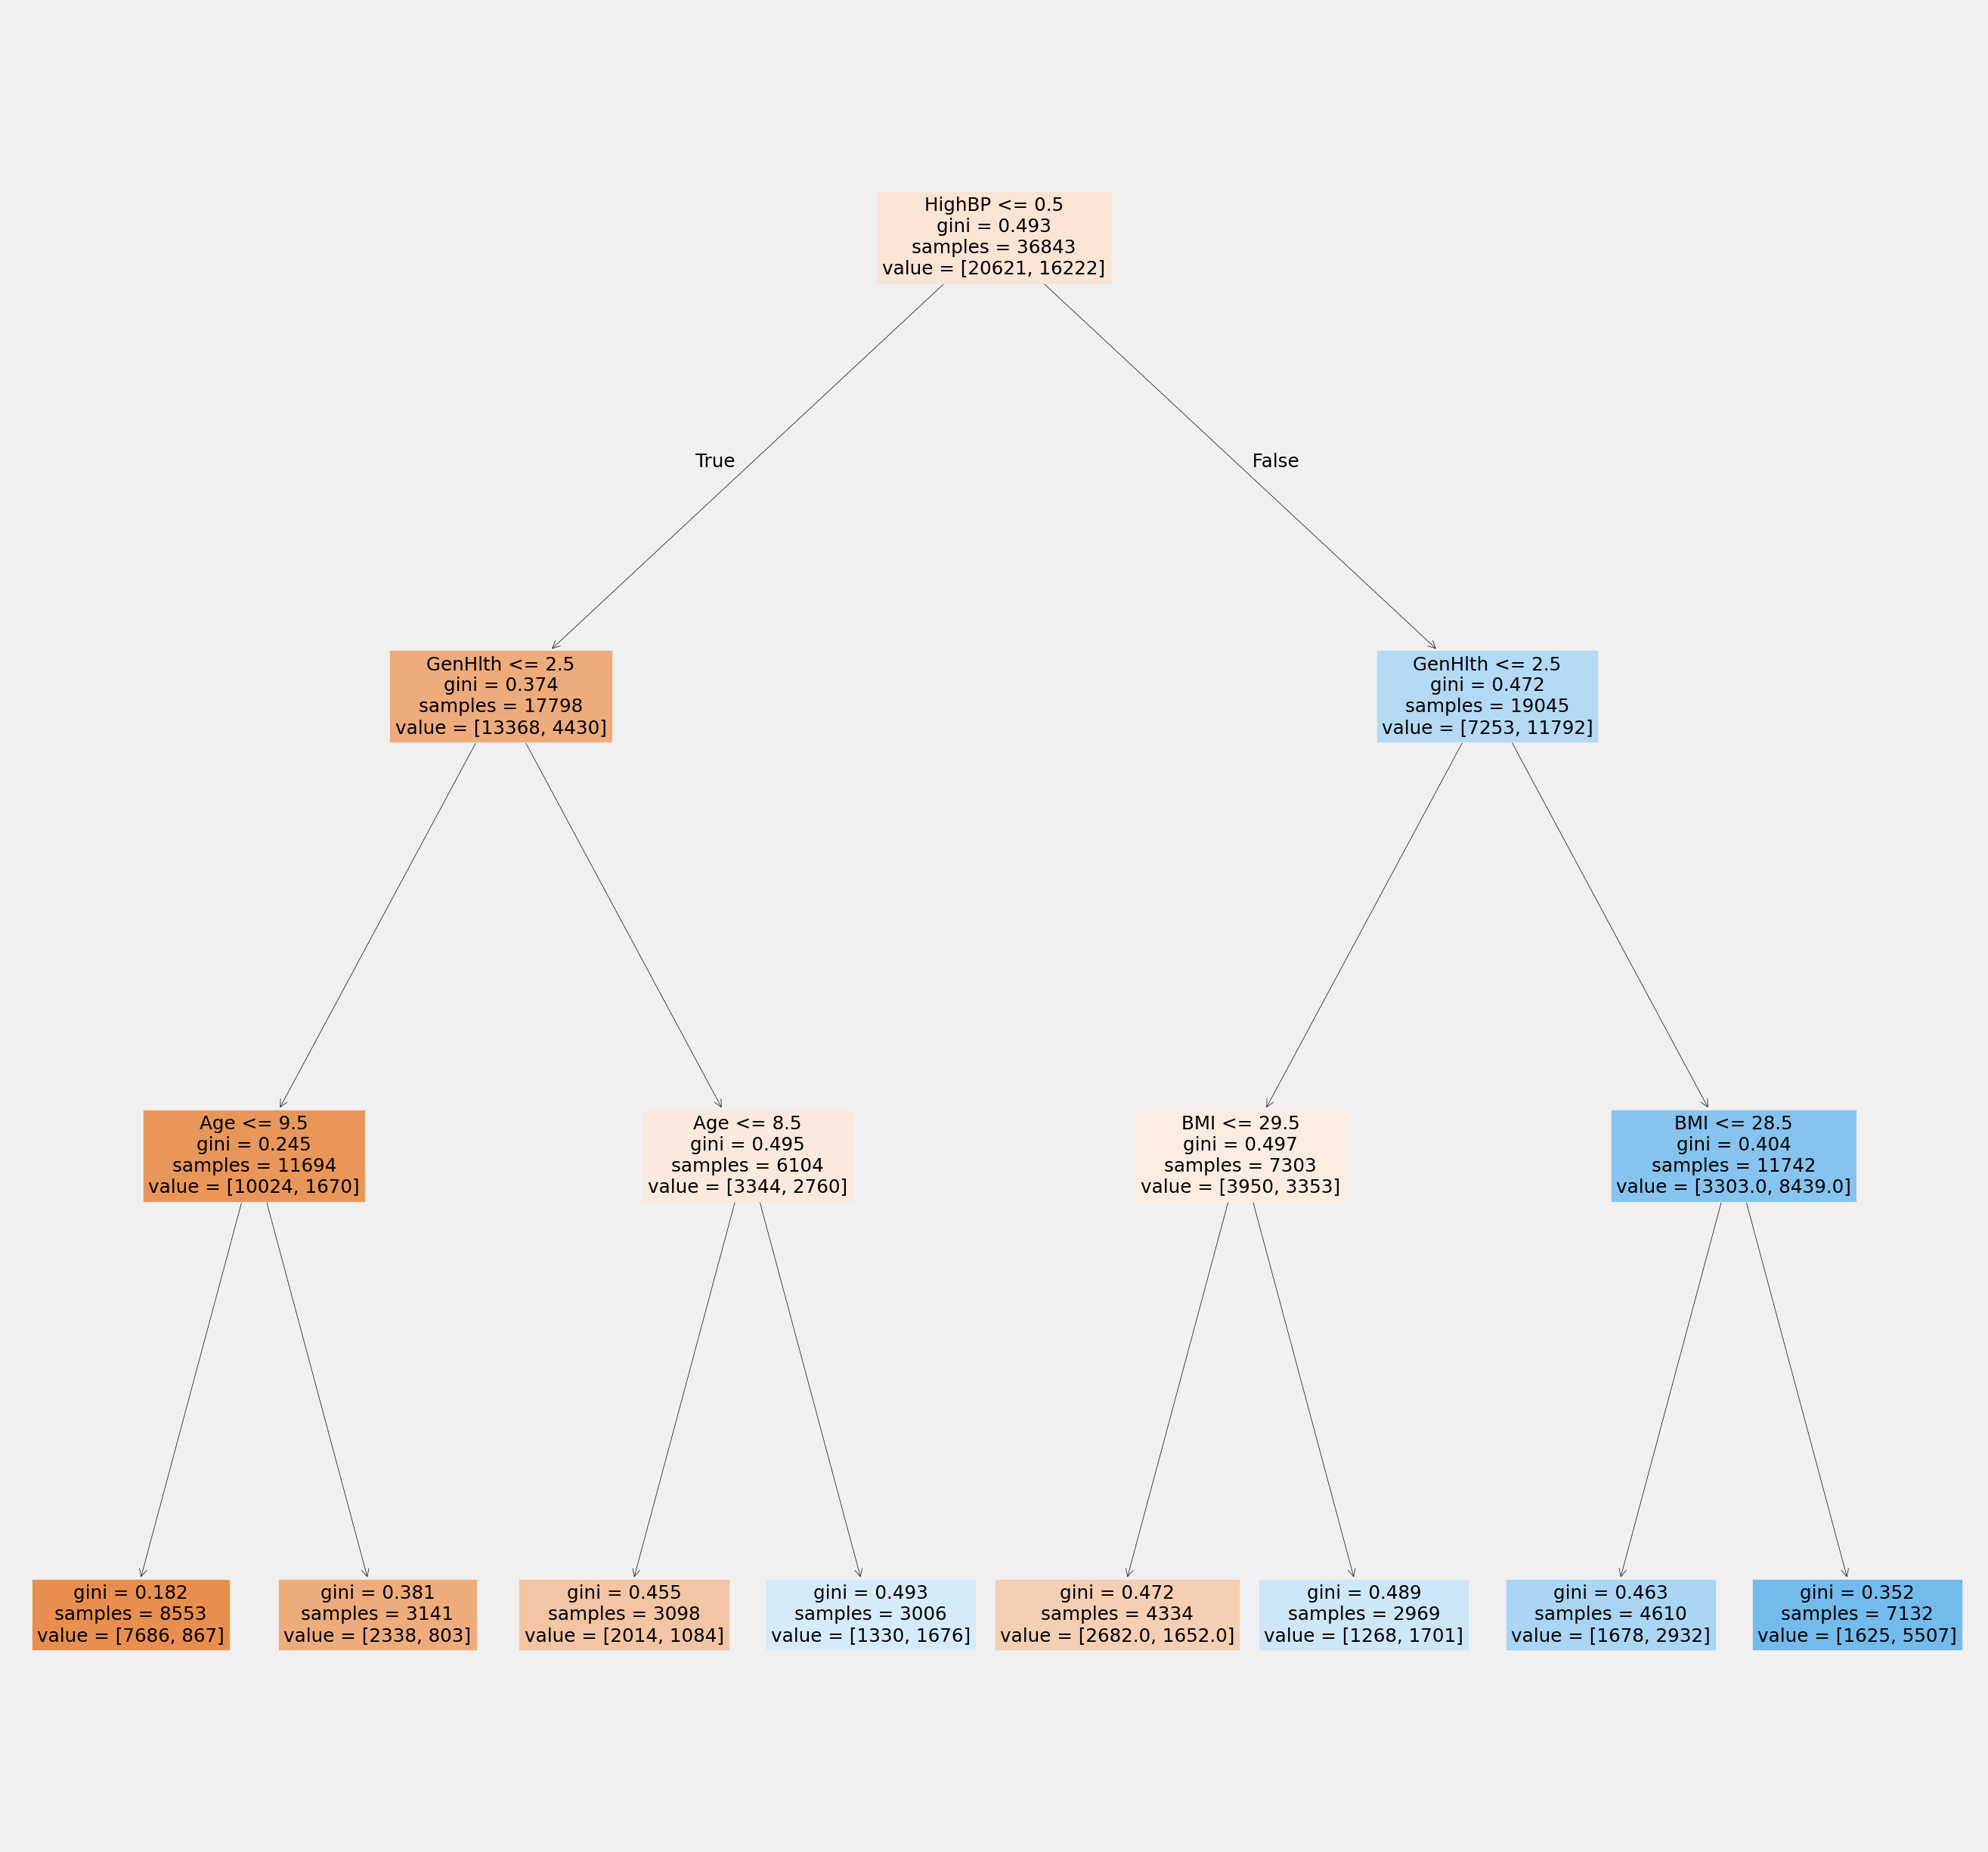

In [22]:
decision_tree(list(diabetes.columns), 3, diabetes)

0  
0.0    5298
2.0    3913
Name: count, dtype: int64
Score on train: 0.725510951876883
Score on test: 0.7322766257735317


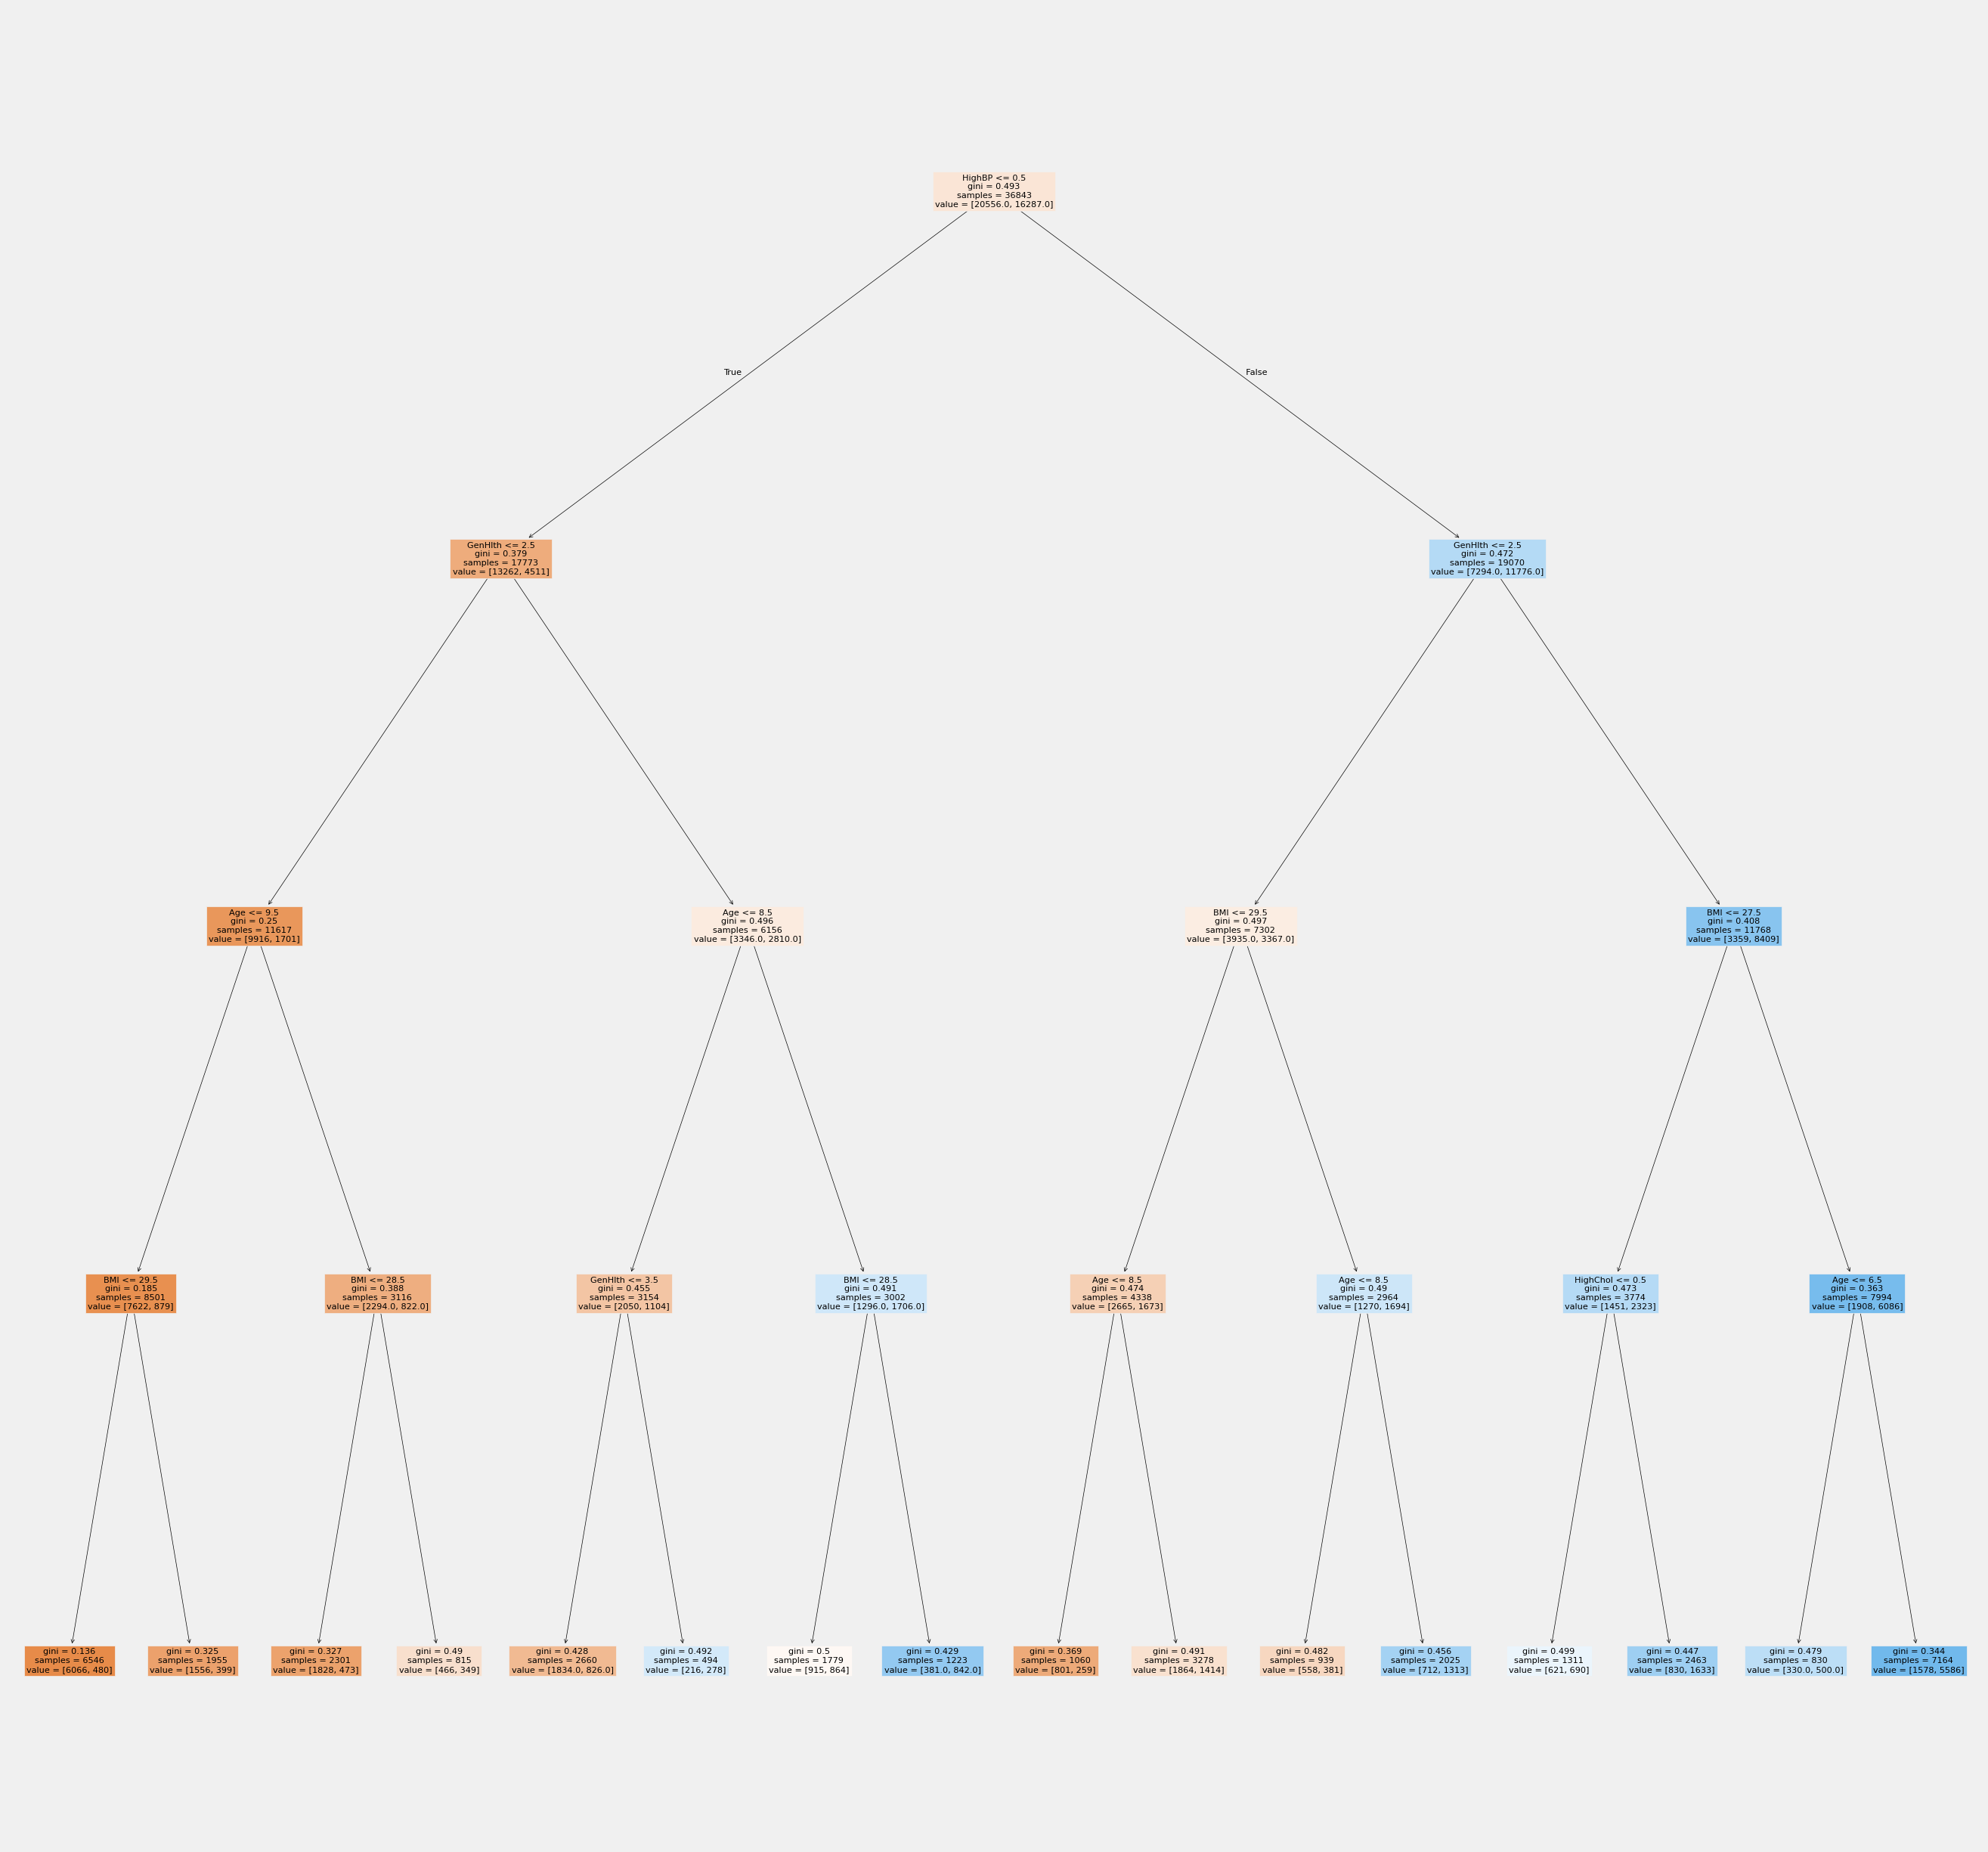

In [23]:
decision_tree(list(diabetes.columns), 4, diabetes)

In [24]:
diabetes.columns

Index(['Diabetes_02', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [25]:
def decision_tree_1(selected, depth, diabetes):
    diabetes = diabetes.filter(selected)
    train_diabetes = diabetes.sample(frac = 0.8)
    test_diabetes = diabetes.drop(index = train_diabetes.index)
    
    X_train_diabetes = train_diabetes.drop(columns='Diabetes_02')
    y_train_diabetes = train_diabetes['Diabetes_02']
    X_test_diabetes = test_diabetes.drop(columns = 'Diabetes_02')
    y_test_diabetes = test_diabetes['Diabetes_02']
    
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    from sklearn.metrics import roc_auc_score
    
    T = DecisionTreeClassifier(max_depth=depth)
    T.fit(X_train_diabetes, y_train_diabetes)
    
    train_score = T.score(X_train_diabetes, y_train_diabetes)
    test_score = T.score(X_test_diabetes, y_test_diabetes)

    return train_score, test_score, selected

In [26]:
best_train_score = 0
best_test_score = 0
best_features = []
    
for _ in range(1_000):
    selected_features = random.sample([f for f in list(diabetes.columns) if f != 'Diabetes_02'], 5)  # Select 5 features (excluding target)
    selected_features = ['Diabetes_02'] + selected_features  # Include target feature in the selection
        
    train_score, test_score, features = decision_tree_1(selected_features, 3, diabetes=diabetes)
    if train_score > best_train_score and test_score > best_test_score:
        best_train_score = train_score
        best_test_score = test_score
        best_features = features
    
print(f"Best Train Score: {best_train_score}")
print(f"Best Test Score: {best_test_score}")
print("Best Features: ", best_features)

Best Train Score: 0.7108541649702793
Best Test Score: 0.7154489197698404
Best Features:  ['Diabetes_02', 'Fruits', 'GenHlth', 'Age', 'BMI', 'NoDocbcCost']


In [27]:
best_train_score = 0
best_test_score = 0
best_features = []
    
for _ in range(1_000):
    selected_features = random.sample([f for f in list(diabetes.columns) if f != 'Diabetes_02'], 5)  # Select 5 features (excluding target)
    selected_features = ['Diabetes_02'] + selected_features  # Include target feature in the selection
        
    train_score, test_score, features = decision_tree_1(selected_features, 3, diabetes=diabetes)
    if train_score > best_train_score and test_score > best_test_score:
        best_train_score = train_score
        best_test_score = test_score
        best_features = features
    
print(f"Best Train Score: {best_train_score}")
print(f"Best Test Score: {best_test_score}")
print("Best Features: ", best_features)

Best Train Score: 0.7188068289770105
Best Test Score: 0.7190315926609488
Best Features:  ['Diabetes_02', 'HighBP', 'BMI', 'Age', 'GenHlth', 'Income']


In [28]:
best_train_score = 0
best_test_score = 0
best_features = []
    
for _ in range(1_000):
    selected_features = random.sample([f for f in list(diabetes.columns) if f != 'Diabetes_02'], 5)  # Select 5 features (excluding target)
    selected_features = ['Diabetes_02'] + selected_features  # Include target feature in the selection
        
    train_score, test_score, features = decision_tree_1(selected_features, 3, diabetes=diabetes)
    if train_score > best_train_score and test_score > best_test_score:
        best_train_score = train_score
        best_test_score = test_score
        best_features = features
    
print(f"Best Train Score: {best_train_score}")
print(f"Best Test Score: {best_test_score}")
print("Best Features: ", best_features)

Best Train Score: 0.7188339711749857
Best Test Score: 0.7164260123765064
Best Features:  ['Diabetes_02', 'Age', 'GenHlth', 'HighBP', 'Income', 'BMI']


#### Testing the combinations of 5 feature selected

0  
2.0    5389
0.0    3822
Name: count, dtype: int64
Score on train: 0.7761801708183793
Score on test: 0.7723724031496665


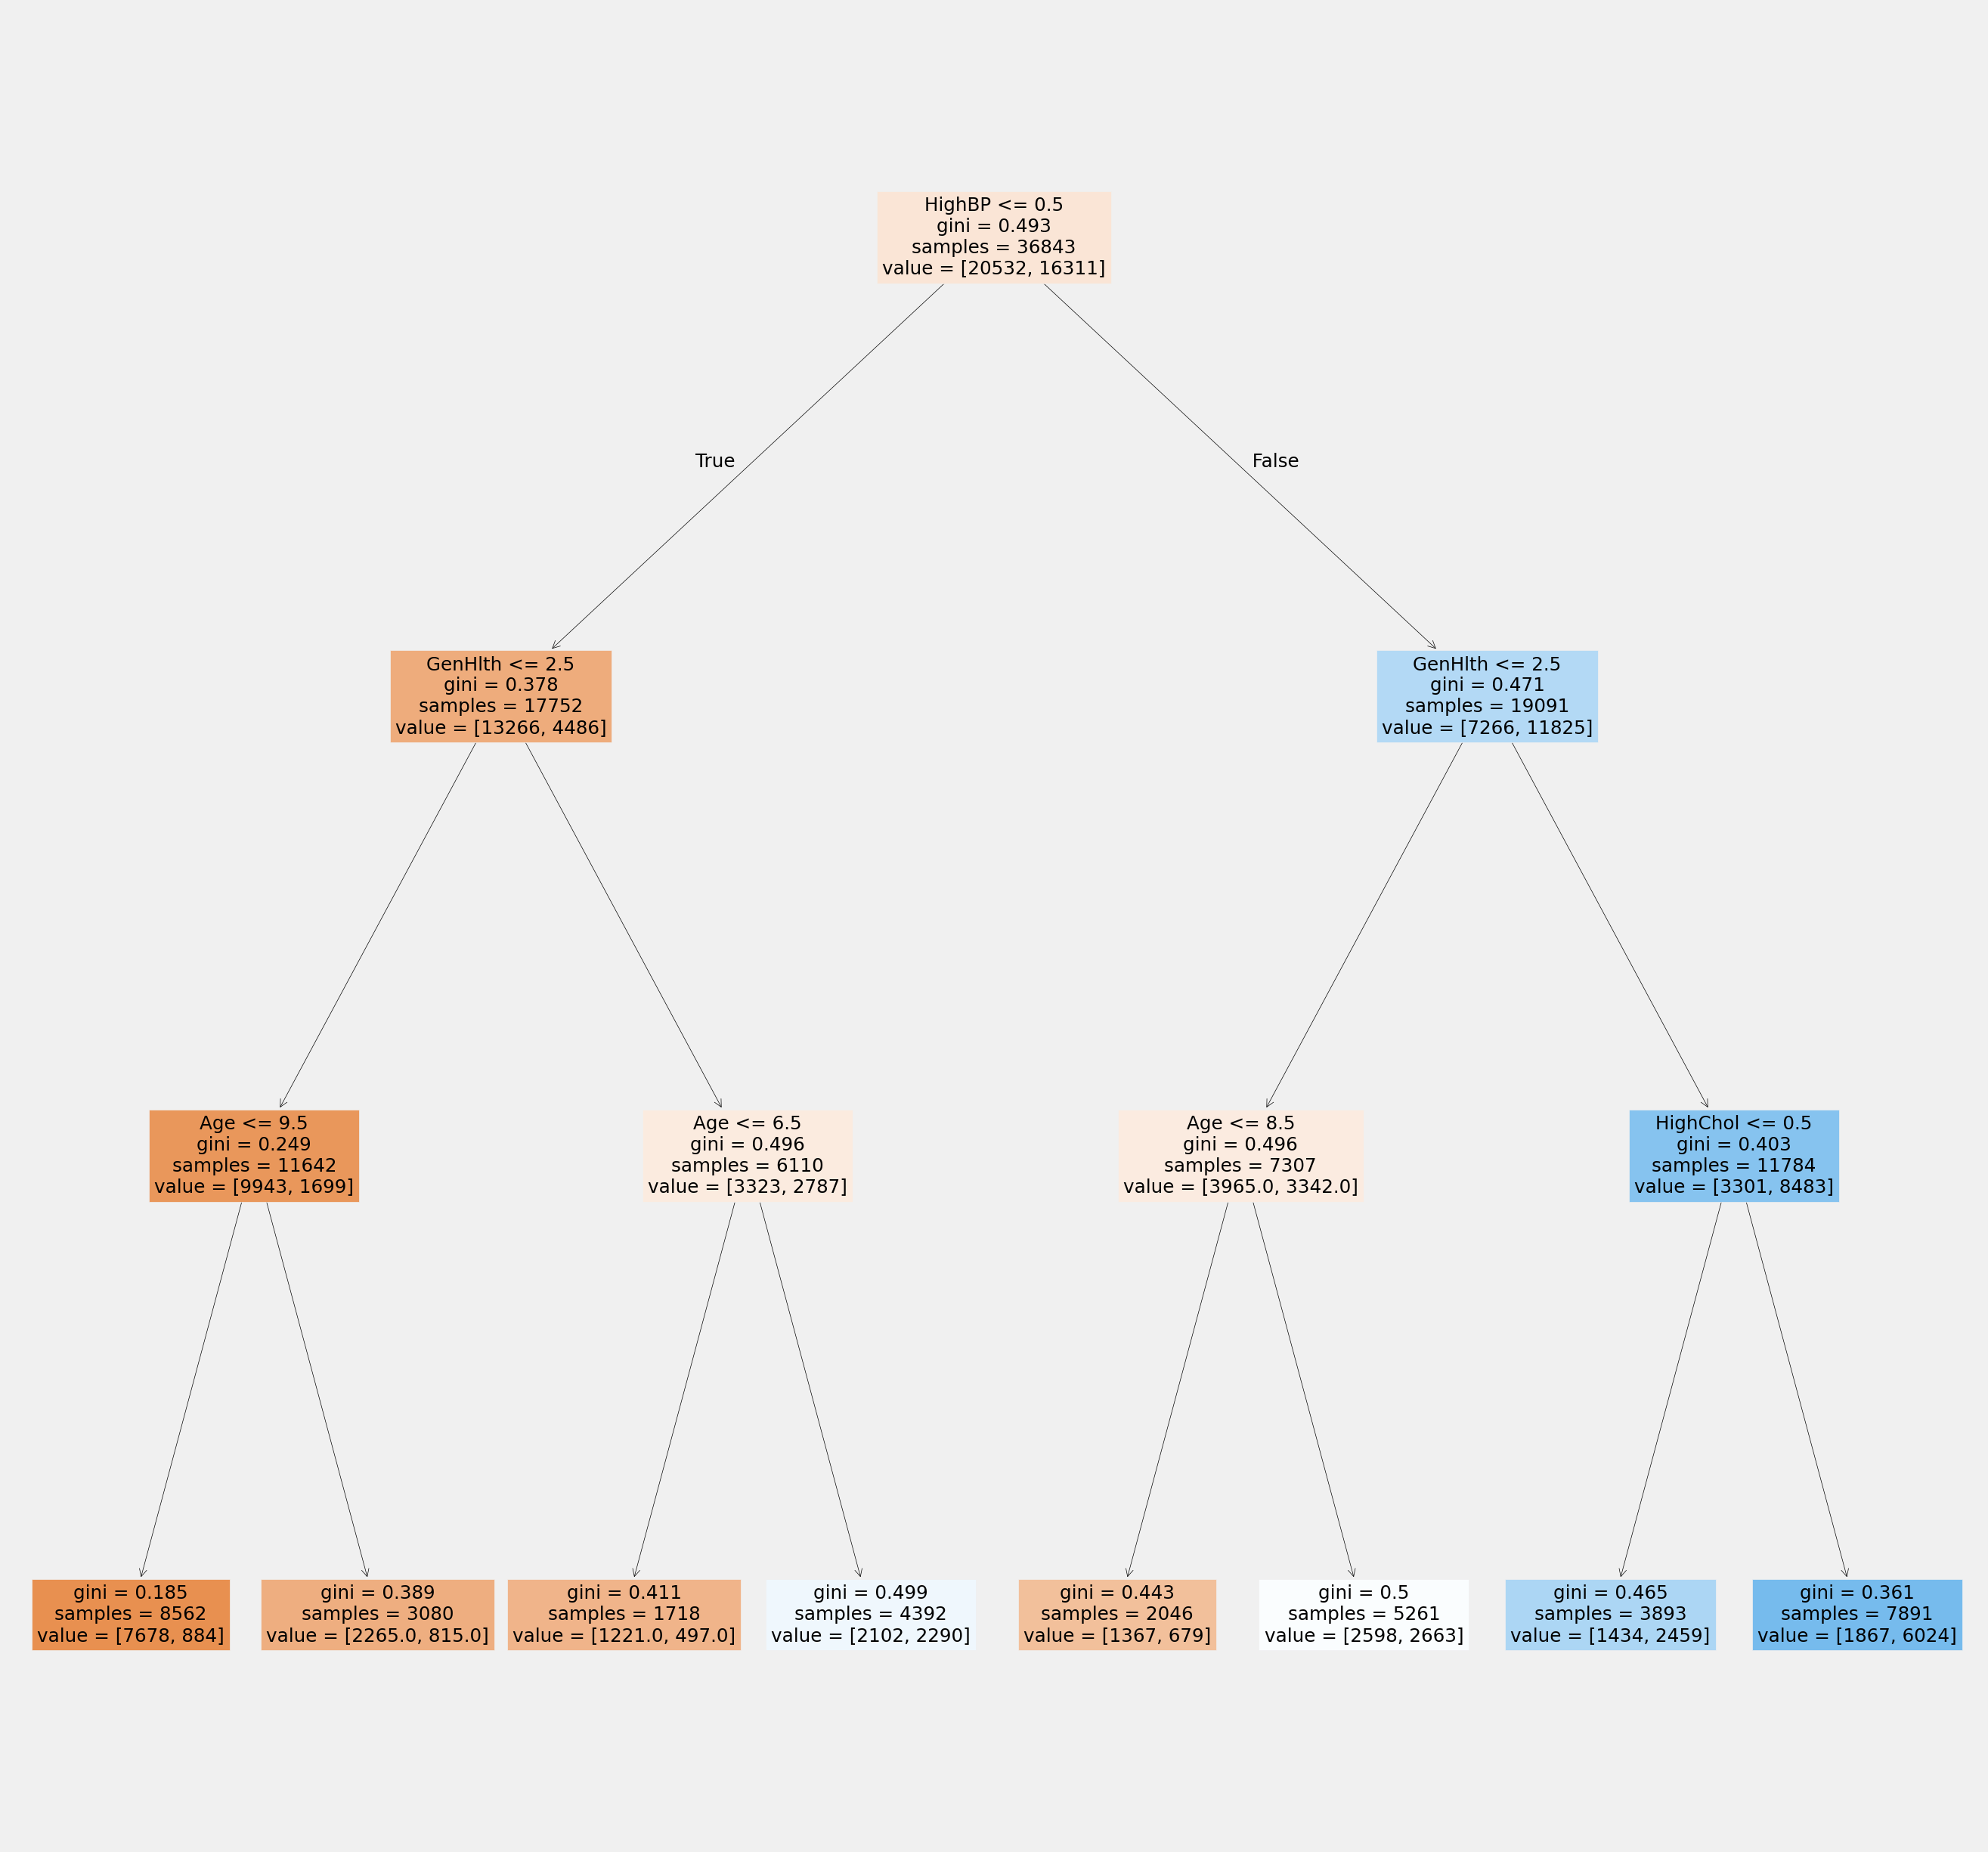

In [31]:
decision_tree(['Diabetes_02', 'HighChol', 'GenHlth', 'Age', 'HeartDiseaseorAttack', 'HighBP'], 3, diabetes)

0  
0.0    4797
2.0    4414
Name: count, dtype: int64
Score on train: 0.7768732908427619
Score on test: 0.7743886807335831


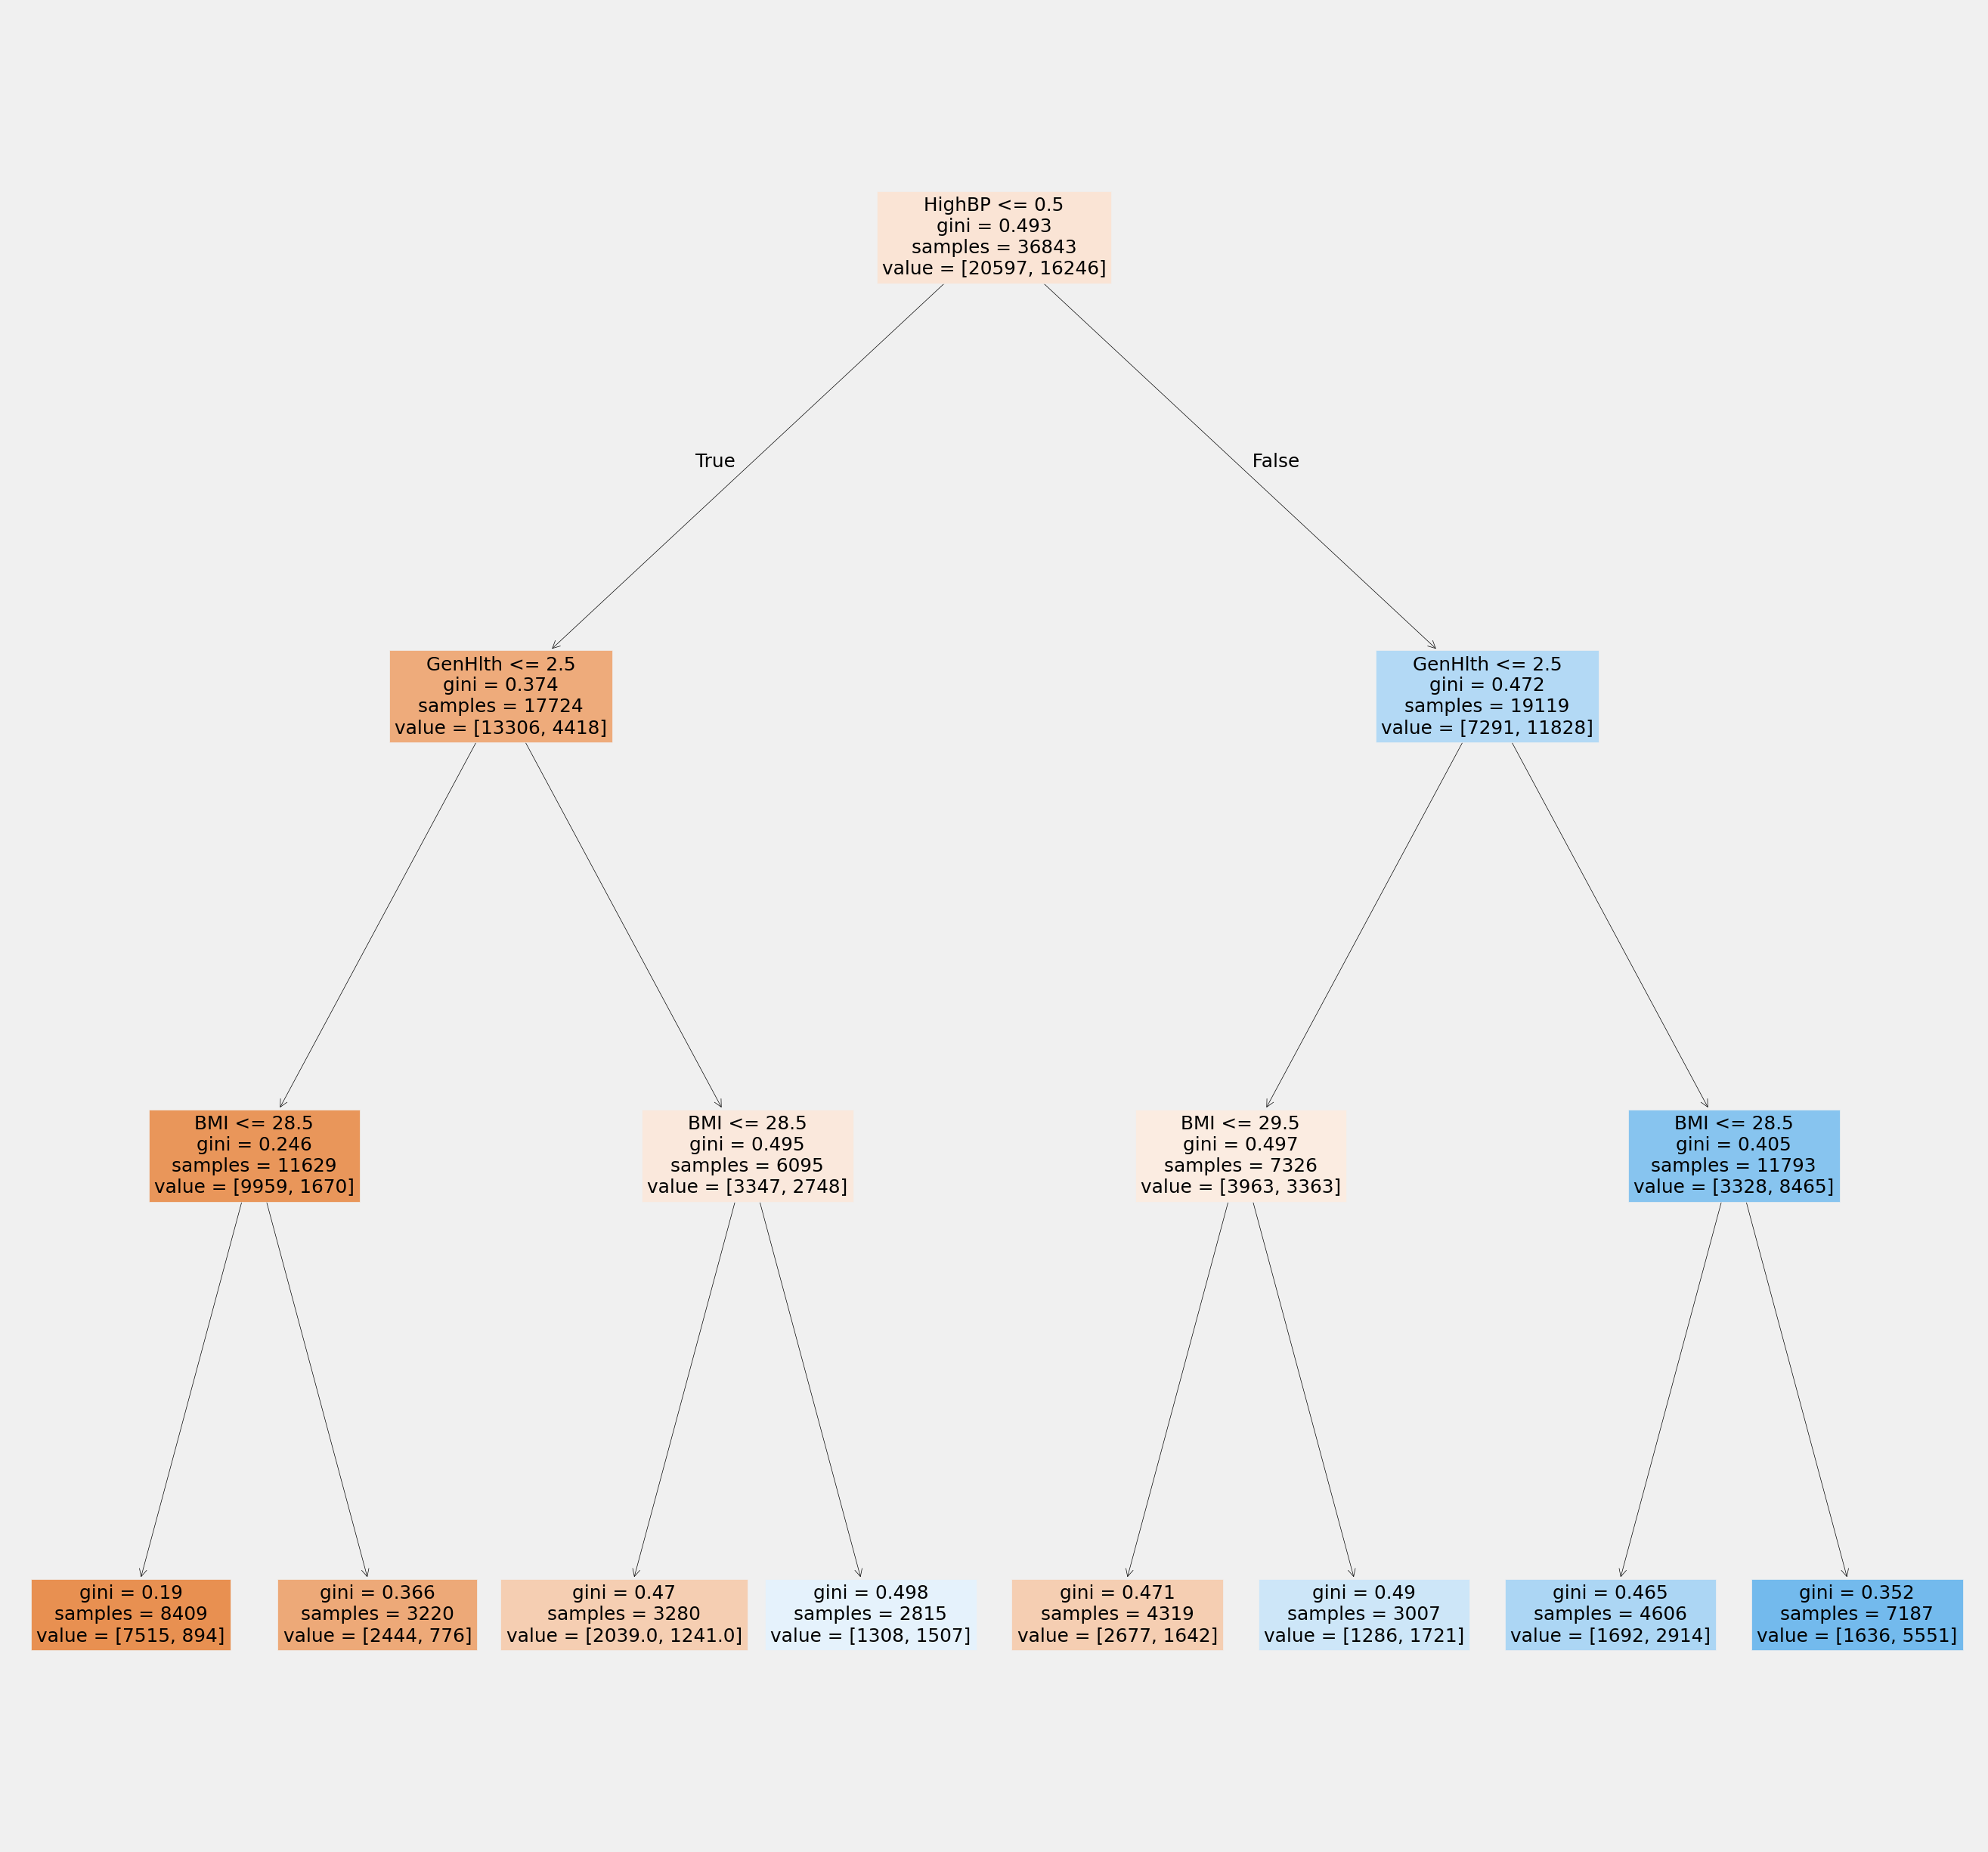

In [32]:
decision_tree(['Diabetes_02', 'GenHlth', 'AnyHealthcare', 'BMI', 'Sex', 'HighBP'], 3, diabetes)

0  
0.0    4893
2.0    4318
Name: count, dtype: int64
Score on train: 0.7772121008182082
Score on test: 0.7735359737669041


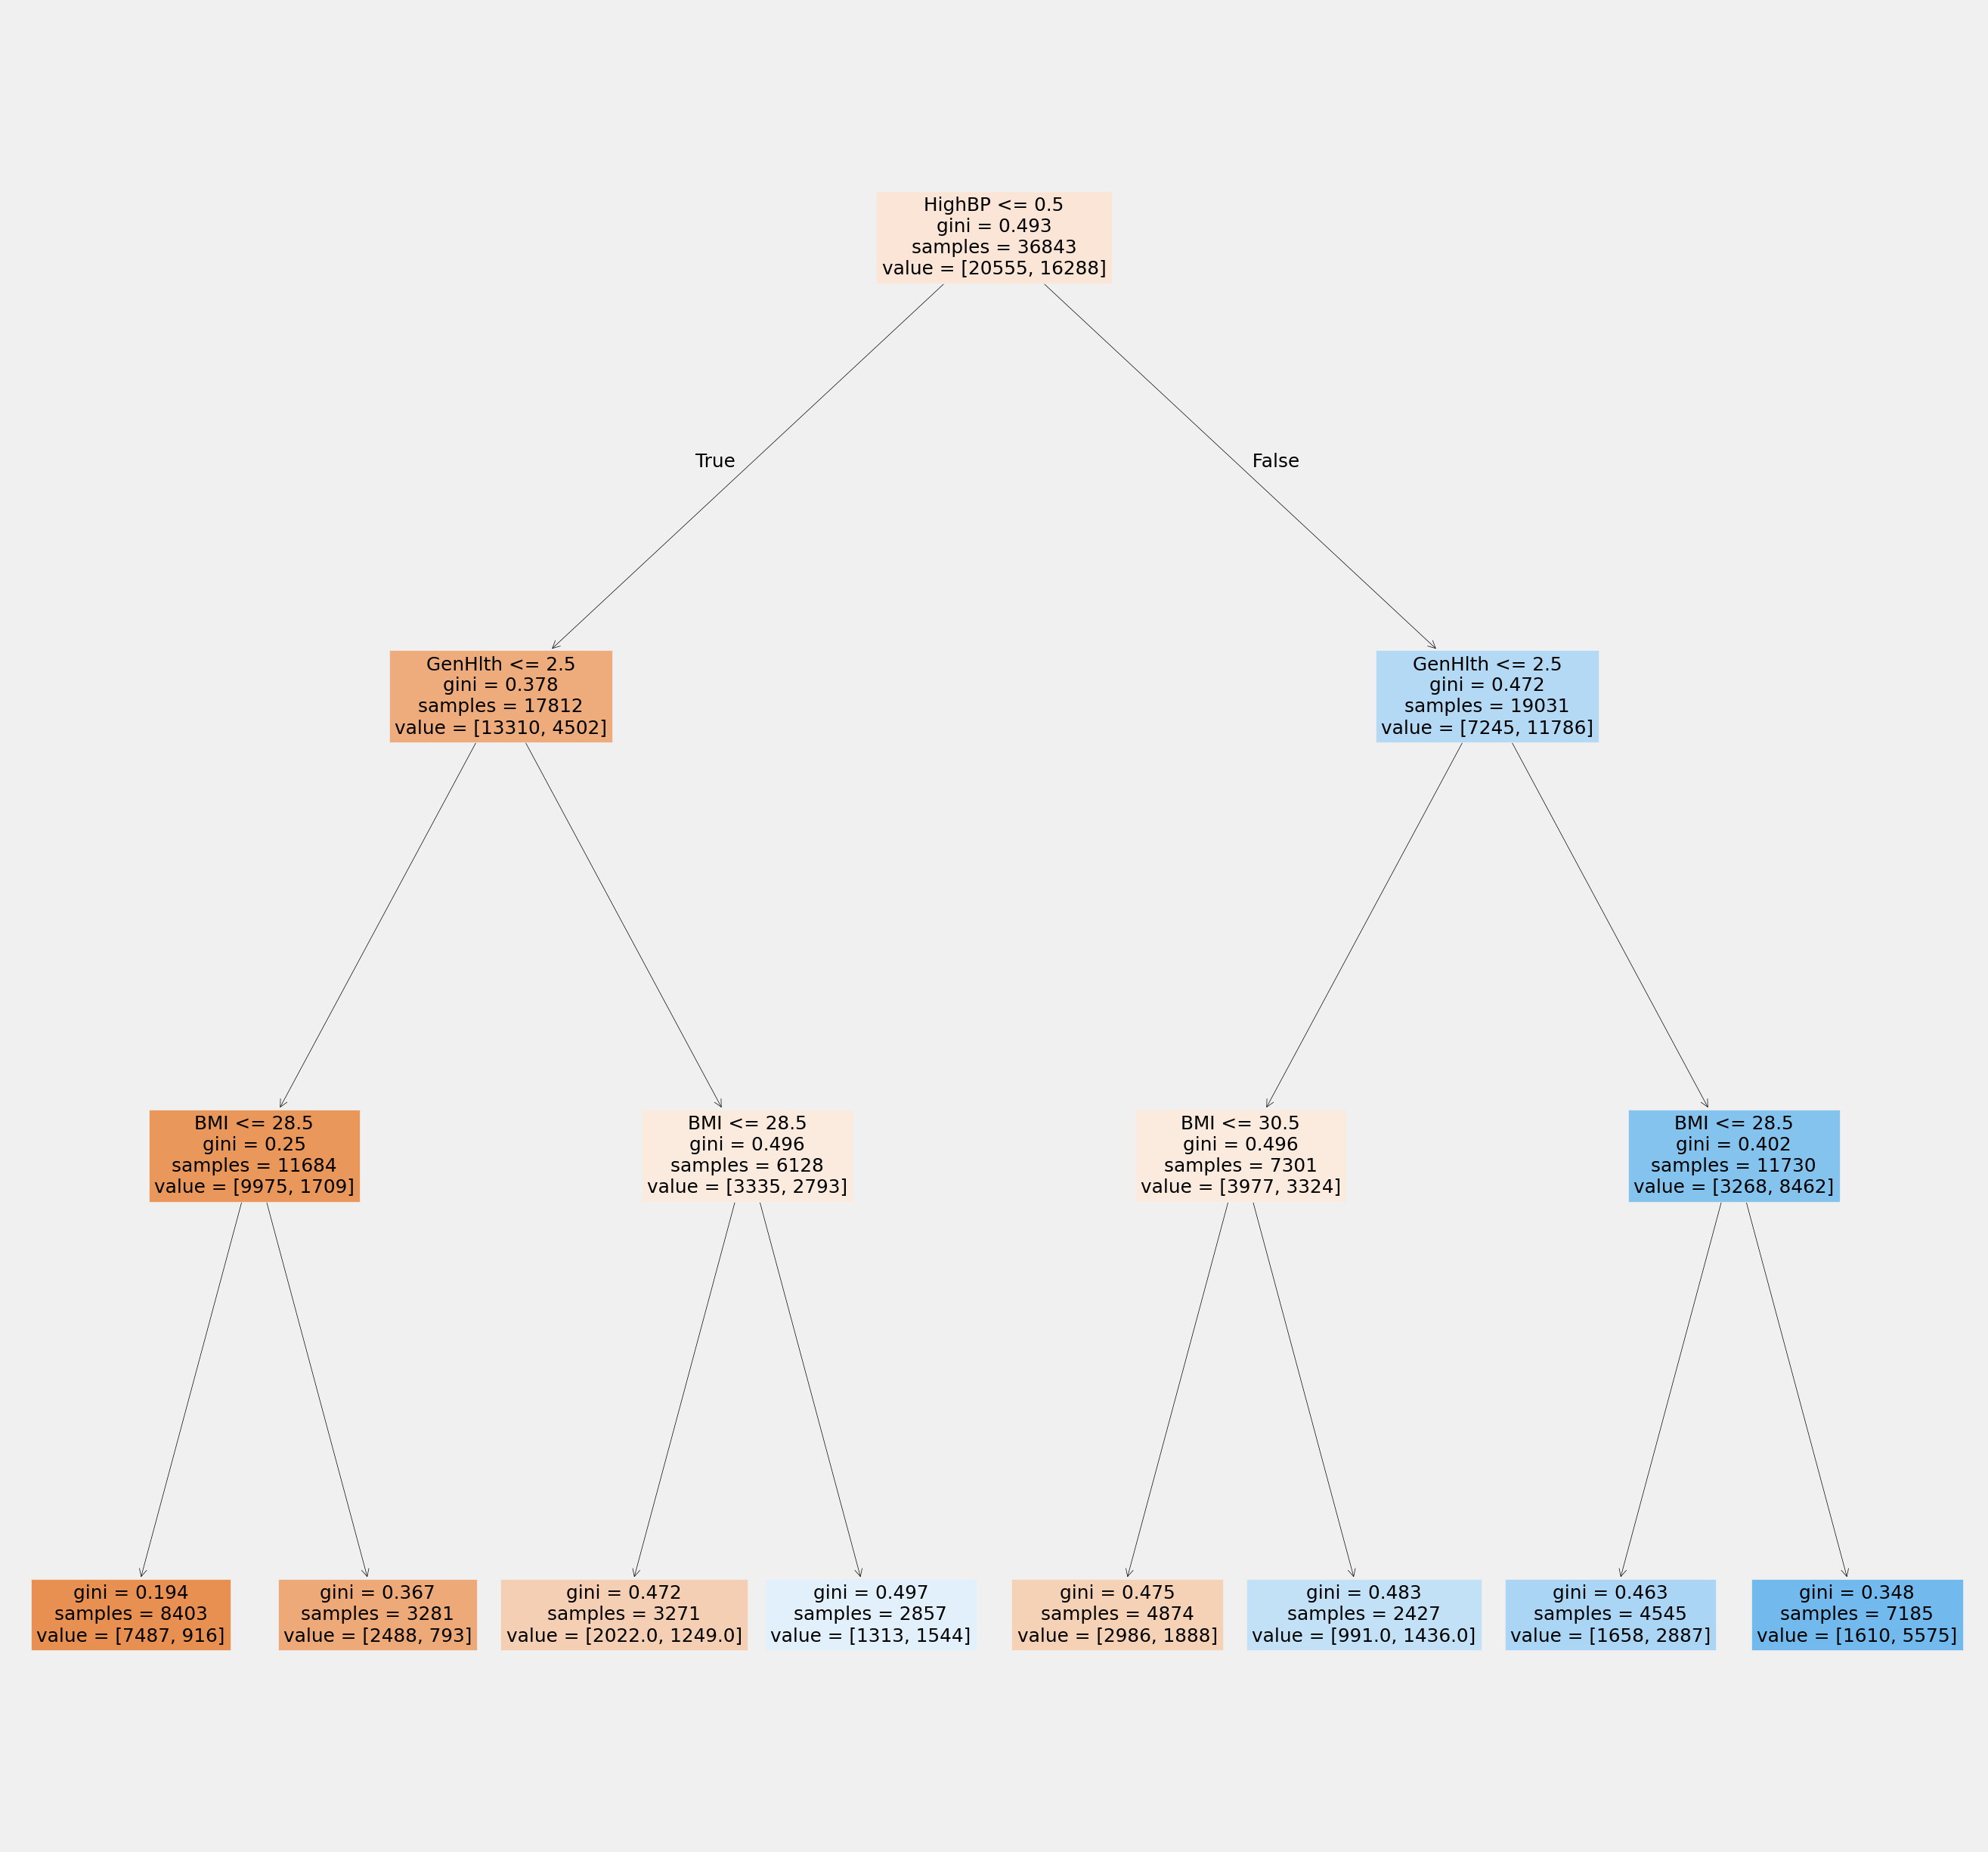

In [33]:
decision_tree(['Diabetes_02', 'Veggies', 'GenHlth', 'BMI', 'DiffWalk', 'HighBP'], 3, diabetes)

## Model 2: Random Forest ##

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics  

train_diabetes = diabetes.sample(frac = 0.8)
test_diabetes = diabetes.drop(index = train_diabetes.index)
    
X_train_diabetes = train_diabetes.drop(columns='Diabetes_02')
y_train_diabetes = train_diabetes['Diabetes_02']
X_test_diabetes = test_diabetes.drop(columns = 'Diabetes_02')
y_test_diabetes = test_diabetes['Diabetes_02']

clf = RandomForestClassifier(n_estimators=1000, max_depth = 3)
clf.fit(X_train_diabetes, y_train_diabetes)
y_pred = clf.predict(X_test_diabetes)
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test_diabetes, y_pred))

ACCURACY OF THE MODEL: 0.7266312018239062
